# Ridge Regression Model 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('clean_salary_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,simplified_title,seniority,salary_range,min_salary,max_salary,avg_salary,company_age,company_name,state,city,headquarters_state,same_location,size_range,min_size,max_size,avg_size,python,sql,excel,R,deep_learning,PhD,bachelor,masters,power_bi,tableau,prob_solver,critical_thinker
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,data analyst,na,$37-$66,37,66,51.5,60,Vera Institute of Justice,NY,New York,NY,1,201 to 500,201,500,350.5,1,1,0,1,0,0,1,0,0,0,0,0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,data analyst,na,$37-$66,37,66,51.5,128,Visiting Nurse Service of New York,NY,New York,NY,1,10000+,10000,30000,20000.0,0,1,1,1,0,0,1,1,0,0,0,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,data analyst,senior,$37-$66,37,66,51.5,18,Squarespace,NY,New York,NY,1,1001 to 5000,1001,5000,3000.5,1,1,1,1,0,1,1,0,0,1,0,0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,data analyst,na,$37-$66,37,66,51.5,19,Celerity,NY,New York,VA,0,201 to 500,201,500,350.5,0,1,0,1,0,0,1,0,0,1,0,0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,data analyst,na,$37-$66,37,66,51.5,12,FanDuel,NY,New York,NY,1,501 to 1000,501,1000,750.5,1,1,1,1,0,0,1,0,0,0,0,0


In [3]:
#Picked variables which are slightly more correlated. Let's see if the ridge regression
# can handle this better and give us a more efficient model. 
 

#potential features to analyze based on information from the EDA Notebook 
features=['Rating', 'Type of ownership', 'Sector', 'Revenue', 'simplified_title', 'seniority', 'company_age',
       'state', 'same_location', 'python', 'sql', 'excel',
       'deep_learning', 'PhD', 'bachelor', 'masters', 'power_bi', 'tableau', 'Founded', 'avg_size', 'avg_salary']

#create the data frame needed for the modeling 
df_inter=df[features]

#one hot endode the variables 
df_dummies=pd.get_dummies(df_inter)

#Create the feature matrix, target variable, and train test splits 
X=df_dummies.drop('avg_salary', axis=1)
y=df_dummies.avg_salary

X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
#Ridge Regression: neg_mean_square_root_errors
alphas=np.arange(.01,1, .01)
mean_square_root_scores=[]

for alpha in alphas: 
    lr=Ridge(alpha=alpha, normalize=True)
    score=np.mean(cross_val_score(lr,X_train,y_train,scoring = 'neg_root_mean_squared_error', cv= 5))
    mean_square_root_scores.append(score)

rmse=list(np.abs(np.array(mean_square_root_scores)))
#rmse

In [5]:
#Ridge Regression: neg_mean_absolute_errors
alphas=np.arange(.01,1, .01)
mean_absolute_scores=[]

for alpha in alphas: 
    lr=Ridge(alpha=alpha, normalize=True)
    score=np.mean(cross_val_score(lr,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 5))
    mean_absolute_scores.append(score)
mae=list(np.abs(np.array(mean_absolute_scores)))      

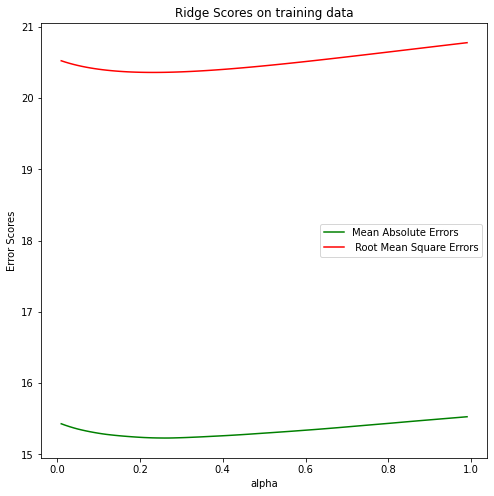

In [6]:
#plot the absolute error lines for the mean absolute errors and the mean square root error 
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae, 'g', label='Mean Absolute Errors')
plt.plot(np.arange(.01,1, .01), rmse, 'r', label=' Root Mean Square Errors')
plt.xlabel('alpha')
plt.ylabel('Error Scores')
plt.legend()
plt.title("Ridge Scores on training data")
plt.show()

In [7]:
#Run a gridsearch on the best possible model for the alpha and see what we can get. 
#create a pipeline to scale the data beforehand
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Ridge())
])

In [8]:
#lets find the optimal alpha for the ridge model. We will test values of alpha from .01 to 1 in .01 increments. 
#Moreover, we will use 5 fold cross validation and select the value of alpha that minimizes the MAE 
grid_search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(.01,1, .01)},
                      cv = 5, scoring="neg_mean_absolute_error"
                      )

In [9]:
#train the grid search 
grid_search.fit(X_train, y_train)

#Find the best alpha value 
print("The best alpha value on training data is ", grid_search.best_params_)

The best alpha value on training data is  {'model__alpha': 0.99}


In [10]:
#The optimal value of alpha on the training data is 0.99 and the cross validated score is the following
#Check this value of alpha on the cross validated data 
rr=Ridge(alpha=grid_search.best_params_['model__alpha'], normalize=True)
np.mean(np.abs(cross_val_score(rr, X_train, y_train, scoring='neg_mean_absolute_error')))

15.528398423529666

### Check the data on the validation set

In [11]:
#Ridge Regression: neg_mean_absolute_errors
alphas=np.arange(.01,1, .01)
mean_absolute_scores_valid=[]

for alpha in alphas: 
    rr=Ridge(alpha=alpha, normalize=True)
    rr.fit(X_train, y_train)
    y_rr=rr.predict(X_val)
    score=mean_absolute_error(y_val, y_rr)
    mean_absolute_scores_valid.append(score)
mae_val=list(np.abs(np.array(mean_absolute_scores_valid))) 

In [12]:
ridge_dict={'alphas': alphas, 'MAE': mae_val}
ridge_df=pd.DataFrame(ridge_dict)
ridge_df.loc[ridge_df.MAE==min(ridge_df.MAE)]
#It looks like the optimal value of alpha that minimizes MAE is going to be 0.11. 

,alphas,MAE
10,0.11,15.400878


In [13]:
#Test the model on validation data 
ridge=Ridge(alpha=0.11, normalize=True)
ridge.fit(X_train, y_train)
predict=ridge.predict(X_val)
mean_absolute_error(y_val, predict)

15.400877837313132

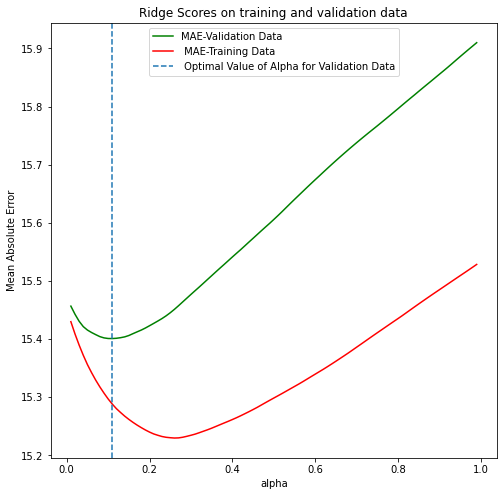

In [14]:
#plot the absolute error lines for the mean absolute errors and the mean square root error 
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae_val, 'g', label='MAE-Validation Data')
plt.plot(np.arange(.01,1, .01), mae, 'r', label=' MAE-Training Data')
plt.axvline(x=0.11, linestyle='--', label=' Optimal Value of Alpha for Validation Data')
plt.xlabel('alpha')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("Ridge Scores on training and validation data")
plt.show()

In [15]:
#Taking a look at the coefficients for the ridge model 
ridge.coef_

array([ 2.87066428e-01, -3.91373236e-03, -6.77044497e-01,  1.98713701e+00,
       -1.81298969e+00, -8.29392086e-01,  3.06808335e-01,  1.14308641e+00,
        0.00000000e+00,  8.58225340e-01, -1.48984196e+00,  1.14214810e+00,
        4.28022448e-04, -6.48505228e-05,  1.50805064e+00,  5.98355813e+00,
       -1.10907301e-01, -5.05953963e-02,  3.04749493e+00,  1.00792046e+00,
       -4.62732645e+00,  2.11268690e+00, -7.03992771e-02, -5.81548904e+00,
        1.10597741e+01, -1.10159065e+01, -6.75574973e+00, -2.62657668e+00,
        1.37931843e+00, -2.10485418e-01,  2.25952377e+00, -2.61114475e+00,
        1.26749495e+01,  6.90123084e+00,  1.13767564e+00,  1.18819623e+00,
        3.56199015e-01, -6.36899574e+00, -3.59653557e+00,  5.98995479e-01,
        2.30206054e+00,  1.26916118e+00, -4.65611393e+00, -9.12954205e-02,
       -7.72793062e+00,  0.00000000e+00, -7.62085878e+00, -3.16196123e+00,
        9.11584222e+00, -7.77452586e+00, -4.79029804e+00,  9.70995653e+00,
        4.43911451e-01,  

#### What happens on the selected features from Lasso? These features were selected in the feature_selection notebook 

In [16]:
selected_feats=['python',
 'Type of ownership_Private Practice / Firm',
 'Sector_Arts, Entertainment & Recreation',
 'Sector_Biotech & Pharmaceuticals',
 'Sector_Health Care',
 'Sector_Telecommunications',
 'Revenue_$1 to $5 million (USD)',
 'Revenue_$25 to $50 million (USD)',
 'Revenue_$5 to $10 billion (USD)',
 'simplified_title_data warehouse enginner',
 'seniority_senior',
 'state_ CA',
 'state_ CO',
 'state_ IL']
X_select=df_dummies[selected_feats]
X_select_train, X_select_val, y_train, y_test=train_test_split(X_select, y, test_size=0.3, random_state=0)

In [17]:
#Ridge Regression: neg_mean_absolute_errors on the select features data 
alphas=np.arange(.01,1, .01)
mean_absolute_scores=[]

for alpha in alphas: 
    rid=Ridge(alpha=alpha, normalize=True)
    score=np.mean(cross_val_score(rid,X_select_train,y_train,scoring = 'neg_mean_absolute_error', cv= 5))
    mean_absolute_scores.append(score)
mae_select=list(np.abs(np.array(mean_absolute_scores)))   

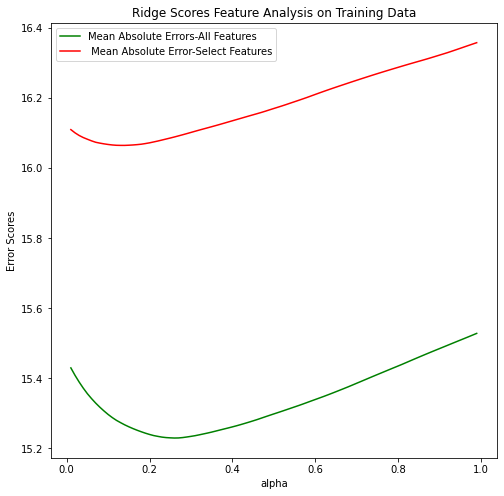

In [18]:
#plot the absolute error lines for the mean absolute errors with model on all features and select features
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae, 'g', label='Mean Absolute Errors-All Features')
plt.plot(np.arange(.01,1, .01), mae_select, 'r', label=' Mean Absolute Error-Select Features')
plt.xlabel('alpha')
plt.ylabel('Error Scores')
plt.legend()
plt.title("Ridge Scores Feature Analysis on Training Data")
plt.show()
#It looks like when we include more features we get a little better of a testing score on the MAE than 
#with the select features for lasso.

In [19]:
#Ridge Regression: neg_mean_absolute_errors
alphas=np.arange(.01,1, .01)
mean_absolute_scores_valid_feats=[]

for alpha in alphas: 
    rr=Ridge(alpha=alpha, normalize=True)
    rr.fit(X_select_train, y_train)
    y_rr=rr.predict(X_select_val)
    score=mean_absolute_error(y_test, y_rr)
    mean_absolute_scores_valid_feats.append(score)
mae_val_feats=list(np.abs(np.array(mean_absolute_scores_valid_feats))) 

In [20]:
ridge_dict={'alphas': alphas, 'MAE': mae_val_feats}
ridge_df=pd.DataFrame(ridge_dict)
ridge_df.loc[ridge_df.MAE==min(ridge_df.MAE)] 

,alphas,MAE
24,0.25,16.383316


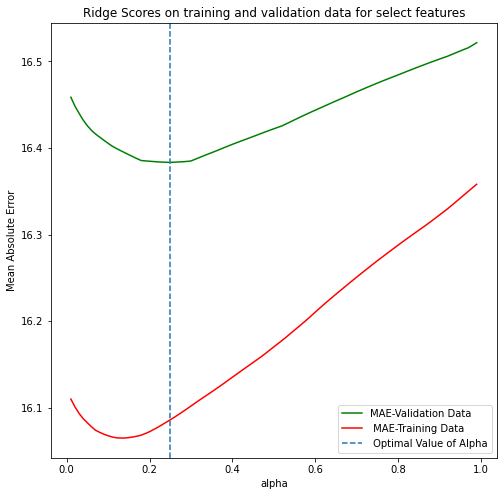

In [21]:
#plot the absolute error lines for the mean absolute errors and the mean square root error 
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae_val_feats, 'g', label='MAE-Validation Data')
plt.plot(np.arange(.01,1, .01), mae_select, 'r', label=' MAE-Training Data')
plt.axvline(x=0.25, linestyle='--', label=' Optimal Value of Alpha')
plt.xlabel('alpha')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("Ridge Scores on training and validation data for select features")
plt.show()

It looks like the Ridge model is more efficient and accurate when there are multiple features considered in the model. The ridge is handling the collinearity better and resulting in a more optimal performance than the Lasso counterpart even with the Lasso having a slighlt better score. This is good since we can handle multiple features that were important based on the EDA. Moreover, we can include even more features into our model. 